## Tutorial 4: Machine Learning and Programming in Python

This tutorial covers boosted tree algorithms.




#### Dear Students, please prepare for the upcoming tutorial. Improving your coding skills involves a trial and error approach. Try to familiarize yourself with Python and the underlying algorithms. Your codes don't need to be perfect or identical, but you should be ready to actively participate in the upcoming discussion!

## Boosted Trees for Classifciation

In the following the titanic dataset is included in order to perform tree based classification methods:

    - Survived: Whether the passenger survived or not (0 = No, 1 = Yes)
    - Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    - Name: Passenger's name
    - Sex: Passenger's sex (male or female)
    - Age: Passenger's age
    - SibSp: Number of siblings/spouses aboard the Titanic
    - Parch: Number of parents/children aboard the Titanic
    - Ticket: Ticket number
    - Fare: Passenger fare
    - Cabin: Cabin number
    - Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt #For the upcoming plots
from sklearn.model_selection import train_test_split

# Load the dataset
titanic = pd.read_csv('Titanicdata.csv')

# Check for NaNs
print("Any NaNs before cleaning?",titanic.isna().any().any())

nan_counts = titanic.isnull().sum()

# Filter to show only columns with NaN values
columns_with_nans = nan_counts[nan_counts > 0]

# Print the columns with NaN values
print("Columns with NaN values:")
print(columns_with_nans)

# Dropping all NaNs
titanic.dropna(subset=['Age'], inplace=True)

# Drop the 'Cabin' column, as dropping 687 rows from the dataset makes it rather small
titanic.drop(columns=['Cabin'], inplace=True)

# Drop NaNs of column Embarked, as the number of NaNs is small
titanic.dropna(subset=['Embarked'], inplace=True)

print("Any NaNs after cleaning?",titanic.isna().any().any())

# Additionally, drop unnecessary columns
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

titanic.Pclass = titanic.Pclass.apply(str)

titanic = pd.get_dummies(titanic, prefix_sep='_', drop_first=True, dtype=float)

ind_var = titanic.drop('Survived', axis=1) #Drop dependent Variable

dep_var = titanic['Survived']

X_train_tit, X_test_tit, y_train_tit, y_test_tit = train_test_split(ind_var, dep_var, test_size=0.3, random_state =10)



Any NaNs before cleaning? True
Columns with NaN values:
Age         177
Cabin       687
Embarked      2
dtype: int64
Any NaNs after cleaning? False


#### The following code demonstrates the implementation and evaluation of an AdaBoost classifier.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit a boosting classifier
boosting = AdaBoostClassifier(estimator = DecisionTreeClassifier(criterion='gini', max_depth= 3), n_estimators = 30, 
                              learning_rate= 0.1,  algorithm= "SAMME",
                              random_state=10)
boosting.fit(X_train_tit, y_train_tit)

# Make predictions on the test set
y_pred_train = boosting.predict(X_train_tit)

# Make predictions on the test set
y_pred = boosting.predict(X_test_tit)

# Evaluate the model
accuracy = accuracy_score(y_train_tit, y_pred_train)
conf_matrix = confusion_matrix(y_train_tit, y_pred_train)
class_report = classification_report(y_train_tit, y_pred_train)

print("Accuracy (train):", accuracy)
print("Confusion Matrix (train):\n", conf_matrix)
print("Classification Report (train):\n", class_report)

# Evaluate the model
accuracy = accuracy_score(y_test_tit, y_pred)
conf_matrix = confusion_matrix(y_test_tit, y_pred)
class_report = classification_report(y_test_tit, y_pred)

print("Accuracy (test):", accuracy)
print("Confusion Matrix (test):\n", conf_matrix)
print("Classification Report (test):\n", class_report)



Accuracy (train): 0.8333333333333334
Confusion Matrix (train):
 [[272  28]
 [ 55 143]]
Classification Report (train):
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       300
           1       0.84      0.72      0.78       198

    accuracy                           0.83       498
   macro avg       0.83      0.81      0.82       498
weighted avg       0.83      0.83      0.83       498

Accuracy (test): 0.8177570093457944
Confusion Matrix (test):
 [[112  12]
 [ 27  63]]
Classification Report (test):
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       124
           1       0.84      0.70      0.76        90

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.81       214
weighted avg       0.82      0.82      0.81       214



In [3]:
from sklearn.model_selection import GridSearchCV

# Define the range of n_estimators values
n_estimators_list = np.linspace(1, 1000, 10, dtype=int)

# Initialize AdaBoost classifier with DecisionTree base estimator 
boosting = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion = "gini", max_depth=5),
                              learning_rate=0.01, algorithm="SAMME", random_state=10)

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': n_estimators_list
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=boosting, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train_tit, y_train_tit)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model found by GridSearchCV
best_boosting = grid_search.best_estimator_

# Evaluate the best model on training set
y_pred_train = best_boosting.predict(X_train_tit)
print("\nTraining Set Metrics:")
print("Accuracy:", accuracy_score(y_train_tit, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_tit, y_pred_train))
print("Classification Report:\n", classification_report(y_train_tit, y_pred_train))

# Evaluate the best model on test set
y_pred_test = best_boosting.predict(X_test_tit)
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test_tit, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test_tit, y_pred_test))
print("Classification Report:\n", classification_report(y_test_tit, y_pred_test))



Best Parameters: {'n_estimators': 334}

Training Set Metrics:
Accuracy: 0.8554216867469879
Confusion Matrix:
 [[290  10]
 [ 62 136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       300
           1       0.93      0.69      0.79       198

    accuracy                           0.86       498
   macro avg       0.88      0.83      0.84       498
weighted avg       0.87      0.86      0.85       498


Test Set Metrics:
Accuracy: 0.8411214953271028
Confusion Matrix:
 [[121   3]
 [ 31  59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       124
           1       0.95      0.66      0.78        90

    accuracy                           0.84       214
   macro avg       0.87      0.82      0.83       214
weighted avg       0.86      0.84      0.83       214



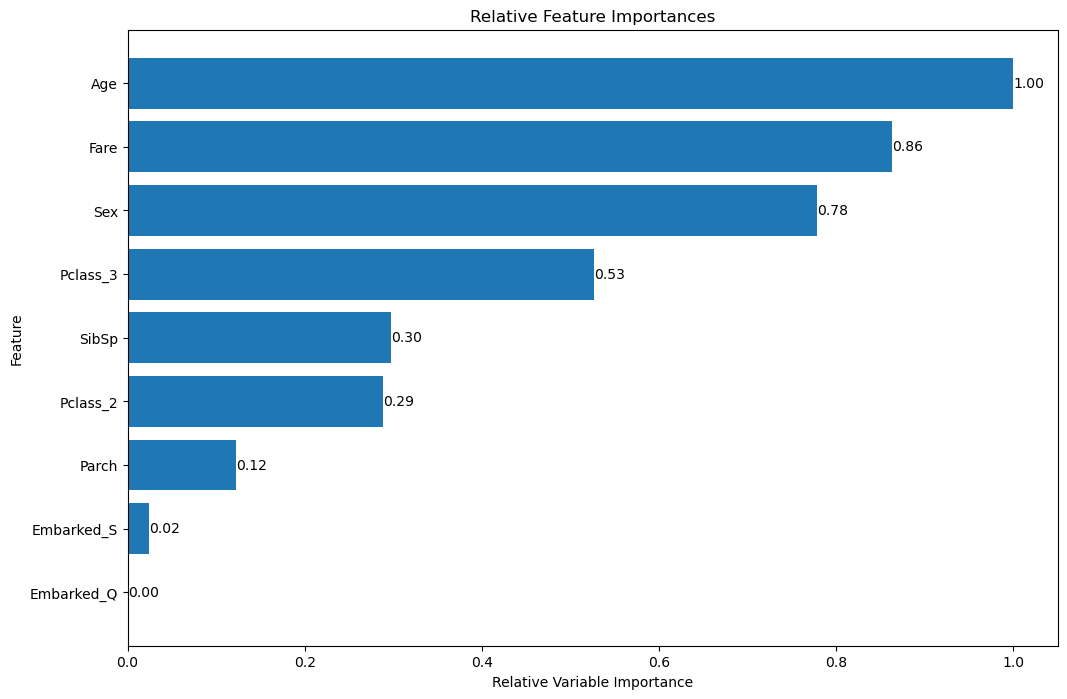

In [4]:
# Calculate the feature importances from the best model (compute mean feature importance for all features!)
importances = np.mean([feature.feature_importances_ for feature in best_boosting.estimators_], axis=0)

# Get the indices that sorts the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Sort importances in descending order
sorted_importances = importances[sorted_indices]

# Calculate relative importances based on the most important feature
relative_importances = sorted_importances / sorted_importances[0]

# Get the feature names
feature_names = X_train_tit.columns

# Get sorted feature names based on sorted importances
sorted_feature_names = feature_names[sorted_indices]

# Plot the relative feature importances
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_feature_names, relative_importances, align='center')
plt.xlabel('Relative Variable Importance')
plt.ylabel('Feature')
plt.title('Relative Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top

# Add text annotations to each bar
for bar, importance in zip(bars, relative_importances):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}', 
             va='center', ha='left', color='black')

# Display the plot
plt.show()

#### We now turn to the Regression example. Code your own boosted regression tree

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_housing = pd.read_csv('boston_house_prices.csv', skiprows=1, names=column_names)

# Delete first row (variable descriptions)
boston_housing = boston_housing.drop(index=0)

# Convert all columns to numeric
boston_housing = boston_housing.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
boston_housing = boston_housing.dropna()

# Split data into features (X) and target (y)
X = boston_housing.drop(columns=['MEDV'])
y = boston_housing['MEDV']

# Split data into training and testing sets
X_train_bost, X_test_bost, y_train_bost, y_test_bost = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Fit a boosting classifier
boosting = DecisionTreeRegressor(estimator = DecisionTreeClassifier(criterion='squared_error', max_depth= 3), n_estimators = n_estirmators_list, random_state=10)
boosting.fit(X_train_tit, y_train_tit)

# Make predictions on the test set
y_pred_train = boosting.predict(X_train_tit)

# Make predictions on the test set
y_pred = boosting.predict(X_test_tit)

# Evaluate the model
accuracy = accuracy_score(y_train_tit, y_pred_train)
conf_matrix = confusion_matrix(y_train_tit, y_pred_train)
class_report = classification_report(y_train_tit, y_pred_train)

print("Accuracy (train):", accuracy)
print("Confusion Matrix (train):\n", conf_matrix)
print("Classification Report (train):\n", class_report)

# Evaluate the model
accuracy = accuracy_score(y_test_tit, y_pred)
conf_matrix = confusion_matrix(y_test_tit, y_pred)
class_report = classification_report(y_test_tit, y_pred)

print("Accuracy (test):", accuracy)
print("Confusion Matrix (test):\n", conf_matrix)
print("Classification Report (test):\n", class_report)


NameError: name 'n_estirmators_list' is not defined